### Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Cleaning Data for this Project

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

### Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three **(3) insights and one (1) visualization** must be produced.

### Reporting for this Project

Create a **300-600 word written report** called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a **250-word-minimum written report** called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.


## Key Points

### Key points to keep in mind when data wrangling for this project:

   - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
    
   - Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
    
   - Cleaning includes merging individual pieces of data according to the rules of tidy data.
    The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
    
   - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


In [ ]:
!pip i

In [2]:

import pandas as pd
import numpy as np
import requests 
import json
import tweepy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
pd.options.display.max_columns=100


# Gathering

In [3]:
#importing twitter-archive-enhanced.csv
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


downloading image_predictions.tsv using request lib and importing the data to pandas

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open('image_predictions.tsv','wb') as file:
    file.write(r.content)

In [5]:
image_prediction=pd.read_csv('image_predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
"""
consumer_key=########
consumer_secret=#########
access_token=#########
access_token_secret=############

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()

for tweet in public_tweets:
    print(tweet.text)
    
"""

'\nconsumer_key=########\nconsumer_secret=#########\naccess_token=#########\naccess_token_secret=############\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\n\napi = tweepy.API(auth)\n\npublic_tweets = api.home_timeline()\n\nfor tweet in public_tweets:\n    print(tweet.text)\n    \n'

In [7]:
#converting tweet-json.json to json data type
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
    

In [8]:
#importing tweet-json.json data to pandas
tweets_df=pd.DataFrame(tweets)
tweets_df.to_csv('tweet_json.csv',index=False)

In [9]:
tweets_df=pd.read_csv('tweet_json.csv')
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336193,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343426,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
columns=['quoted_status_id','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','geo','coordinates','place','contributors','is_quote_status','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','truncated']

for col in columns:
    print(f'{col}\n#######################\n',tweets_df[col].value_counts())

quoted_status_id
#######################
 8.340867e+17    1
8.413114e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.855174e+17    1
8.065709e+17    1
7.251361e+17    1
8.558573e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
8.389487e+17    1
7.591676e+17    1
Name: quoted_status_id, dtype: int64
favorited
#######################
 False    2346
True        8
Name: favorited, dtype: int64
retweeted
#######################
 False    2354
Name: retweeted, dtype: int64
possibly_sensitive
#######################
 False    2211
Name: possibly_sensitive, dtype: int64
possibly_sensitive_appealable
#######################
 False    2211
Name: possibly_sensitive_appealable, dtype: int64
geo
#######

## Assessing Data for this Project

In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive['name'].value_counts().keys().values

array(['None', 'a', 'Charlie', 'Cooper', 'Oliver', 'Lucy', 'Lola', 'Penny',
       'Tucker', 'Winston', 'Bo', 'the', 'Sadie', 'Buddy', 'Bailey', 'an',
       'Daisy', 'Toby', 'Milo', 'Koda', 'Bella', 'Dave', 'Jack', 'Scout',
       'Leo', 'Oscar', 'Jax', 'Rusty', 'Stanley', 'Phil', 'Louis', 'Sunny',
       'Oakley', 'very', 'Larry', 'Gus', 'Finn', 'Alfie', 'Chester',
       'Bentley', 'George', 'Sammy', 'Duke', 'Shadow', 'Gary', 'Bruce',
       'one', 'Sophie', 'Gerald', 'Archie', 'Ruby', 'Luna', 'Jeffrey',
       'Hank', 'Clark', 'Chip', 'Maximus', 'Moose', 'Derek', 'just',
       'Bear', 'quite', 'Carl', 'Dexter', 'Boomer', 'Maddie', 'Loki',
       'Scooter', 'Sampson', 'Cassie', 'Beau', 'Reginald', 'Walter',
       'Reggie', 'Brody', 'Clarence', 'Maggie', 'Riley', 'Winnie', 'Jerry',
       'Reese', 'Lorenzo', 'Doug', 'Klevin', 'Zoey', 'Calvin', 'Nala',
       'Colby', 'Coco', 'Frankie', 'Peaches', 'Mia', 'Jimothy', 'Arnie',
       'Earl', 'Ellie', 'Wilson', 'Zeke', 'Wyatt', 'Sebasti

In [14]:
pd.set_option('display.max_colwidth',-1)
twitter_archive[twitter_archive['name'].str.islower()<=3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [15]:
twitter_archive[twitter_archive['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [16]:
temp=twitter_archive[['tweet_id','doggo','floofer','pupper','puppo']].replace(['doggo','floofer','pupper','puppo'],True)
temp=temp.replace('None',False)


In [17]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id    2356 non-null int64
doggo       2356 non-null bool
floofer     2356 non-null bool
pupper      2356 non-null bool
puppo       2356 non-null bool
dtypes: bool(4), int64(1)
memory usage: 27.7 KB


In [18]:
#checking how many dogs have more than one stage
temp['check']=temp['doggo'].astype('int')+temp['floofer'].astype('int')+temp['pupper'].astype('int')+temp['puppo'].astype('int')
stage_error=temp[temp['check']>1]
stage_error

,tweet_id,doggo,floofer,pupper,puppo,check
191,855851453814013952,True,False,False,True,2
200,854010172552949760,True,True,False,False,2
460,817777686764523521,True,False,True,False,2
531,808106460588765185,True,False,True,False,2
565,802265048156610565,True,False,True,False,2
575,801115127852503040,True,False,True,False,2
705,785639753186217984,True,False,True,False,2
733,781308096455073793,True,False,True,False,2
778,775898661951791106,True,False,True,False,2
822,770093767776997377,True,False,True,False,2


In [19]:
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336193,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashta

In [20]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null 

In [21]:
image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [25]:
twitter_archive.query('rating_numerator>10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [26]:
twitter_archive.query('rating_denominator!=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [27]:
#checking if high rating are true or errors
print(twitter_archive.expanded_urls[2074])
print(twitter_archive.expanded_urls[979])
print(twitter_archive.expanded_urls[1634])


https://twitter.com/dog_rates/status/670842764863651840/photo/1
https://twitter.com/dog_rates/status/749981277374128128/photo/1
https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1


In [28]:
twitter_archive[twitter_archive.expanded_urls.str.len()>len('https://twitter.com/dog_rates/status/684225744407494656/photo/1')+5].expanded_urls.values

array([ 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
       'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
       'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
       'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1',
       'https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1',
       'https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1',
       'https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272

#### Quality
##### `twitter_archive` table
- timestamp column in string format
- retweeted_status_id in float instead of string or int   ///////
- columns with dominant null values and are not necessary for us (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- text column have shortcut url at the end of each text      ////////////
- some expanded_urls have multiple urls like index(1634)
- source column have html format      ////////
- strange values in rating_denominator 
- strange values in rating_numerator
- twitter_archive have 181 retweets and 78 replies we only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- strange dog names like( a, an, the)
- there is 14 dogs have two stages
##### `tweets_df` table
- created_at column in string format instead of timedate///////
- display_text_range between [0, n] rename column to text length        
- columns with dominant null values (in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str ,quoted_status )
- entities, extended_entities columns contain info about media attachment in tweet
- full_text column have shortcut url at the end of each text /////////////



##### `image_prediction` table

- dog types not in the same format (lower and upper)





#### Tidiness
- dog stage variable in Four columns in `twitter_archive` table (doggo ,floofer ,pupper ,puppo)
- two id columns in different format in `tweets_df` table

- timestamp, text, and source are duplicated in df and tweets_df table

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- combine twitter_archive, tweets_df and image_prediction in one table



# Cleaning

In [29]:
#getting copies of original dataframe
twitter_archive_clean=twitter_archive.copy()
tweets_df_clean=tweets_df.copy()
image_prediction_clean=image_prediction.copy()


### define
#### `df`: timestamp column in string format not datetime


### clean

In [30]:
#change timestamp column to datetime type
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

### test

In [31]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### define
#### `tweet_df`:display_text_range between [0, n] and rename column to text length 


In [32]:
tweets_df_clean.display_text_range[10]

'[0, 130]'

### clean

In [33]:
#change display_text_range from string type to int
tweets_df_clean.display_text_range=tweets_df.display_text_range.str.split(", ",1).str[1].str[:-1].astype(int)
tweets_df_clean.rename(columns={'display_text_range':'text_length'},inplace=True)


### test

In [34]:
tweets_df_clean.head()

,contributors,coordinates,created_at,text_length,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,85,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336193,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,138,"{'hashtags': [], 'symbols': [

### define
dropping 181 retweets and 78 replies from 'twitter_archive_clean'

### clean

In [35]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

### test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### define
dropping [retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id] columns

### clean

In [37]:
#dropping [retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id] columns
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'],inplace=True)

### test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### define

merging 'twitter_archive' and 'tweet_df'
### clean

In [39]:
# Merge the three DataFrames into one DataFrame, starting first with twitter_archive_clean and tweets_df_clean
merge_df=twitter_archive_clean.merge(tweets_df_clean[['id','text_length','retweet_count','favorite_count']],left_on='tweet_id',right_on='id',how='left')

### test

In [40]:
#check merge
merge_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,text_length,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,892420643555336193,85,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,892177421306343426,138,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,891815181378084864,121,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,891689557279858688,79,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,891327558926688256,138,9774,41048


In [41]:
#check merge info
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 16 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
id                    2097 non-null int64
text_length           2097 non-null int64
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), int64(7), object(8)
memory usage: 278.5+ KB


### define

dropping id column since there is to id columns tweet_id and id

### clean

In [42]:
#dropping id column since there is to id columns tweet_id and id
merge_df.drop(columns='id',inplace=True)

### test

In [43]:
#check dropping status
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
text_length           2097 non-null int64
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 262.1+ KB


### define

merging 'image_prediction' and 'merge_df' and save to disk
### clean

In [44]:
# final Merge 
df=merge_df.merge(image_prediction_clean,on='tweet_id',how='left')

#save dataframe to disk
df.to_csv('df_clean.csv',index=False)

In [45]:
#read csv
df=pd.read_csv('df_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 26 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
text_length           2097 non-null int64
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null o

### define

remove tweets that don't have images
### clean

In [46]:
# requirements we will delete the tweets without an image.
df=df[df.jpg_url.notnull()]

### test

In [47]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
text_length           1971 non-null int64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null o

### define
remove multiple values for dog stages

### clean

In [48]:
#getting the indexies for the 14 dogs that have two stages
list(stage_error.tweet_id.values)

[855851453814013952,
 854010172552949760,
 817777686764523521,
 808106460588765185,
 802265048156610565,
 801115127852503040,
 785639753186217984,
 781308096455073793,
 775898661951791106,
 770093767776997377,
 759793422261743616,
 751583847268179968,
 741067306818797568,
 733109485275860992]

In [49]:
#fixing dogs stages
index=df[['tweet_id','text','doggo','floofer','pupper','puppo']].query('tweet_id==[855851453814013952,854010172552949760,817777686764523521,808106460588765185,802265048156610565,801115127852503040,785639753186217984,781308096455073793,775898661951791106,770093767776997377,759793422261743616,751583847268179968,741067306818797568,733109485275860992]').index
df[['tweet_id','text','doggo','floofer','pupper','puppo']].query('tweet_id==[855851453814013952,854010172552949760,817777686764523521,808106460588765185,802265048156610565,801115127852503040,785639753186217984,781308096455073793,775898661951791106,770093767776997377,759793422261743616,751583847268179968,741067306818797568,733109485275860992]')

,tweet_id,text,doggo,floofer,pupper,puppo
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
161,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
358,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
446,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
536,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,None,pupper,None
748,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,None,pupper,None
848,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None
897,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None


In [50]:
#printing text to identify and correct wrong stages
for i in index.values:
    print(df.tweet_id[index.values][i],' : ',df.text[index.values][i])
    print('################')

855851453814013952  :  Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
################
854010172552949760  :  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
################
817777686764523521  :  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
################
808106460588765185  :  Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
################
801115127852503040  :  This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
################
785639753186217984  :

In [51]:
# Change dog types identified in the tweet_ids above

#change doggo None
df.loc[df.tweet_id == 855851453814013952, 'doggo'] = 'None'

#change doggo None
df.loc[df.tweet_id == 854010172552949760, 'doggo'] = 'None'

#change pupper None
df.loc[df.tweet_id == 817777686764523521, 'pupper'] = 'None'

#change pupper and doggo None
df.loc[df.tweet_id == 808106460588765185, 'pupper'] = 'None'
df.loc[df.tweet_id == 808106460588765185, 'doggo'] = 'None'

#change pupper None
df.loc[df.tweet_id == 801115127852503040, 'pupper'] = 'None'

#change pupper None
df.loc[df.tweet_id == 785639753186217984, 'pupper'] = 'None'

#change pupper and doggo None
df.loc[df.tweet_id == 759793422261743616, 'doggo'] = 'None'
df.loc[df.tweet_id == 759793422261743616, 'pupper'] = 'None'

#change pupper and doggo None
df.loc[df.tweet_id == 751583847268179968, 'doggo'] = 'None'
df.loc[df.tweet_id == 751583847268179968, 'pupper'] = 'None'

#change pupper and doggo None
df.loc[df.tweet_id == 741067306818797568, 'doggo'] = 'None'
df.loc[df.tweet_id == 741067306818797568, 'pupper'] = 'None'

#change pupper and doggo None
df.loc[df.tweet_id == 733109485275860992, 'doggo'] = 'None'
df.loc[df.tweet_id == 733109485275860992, 'pupper'] = 'None'

### test

In [52]:
#check to see if values changed correctly
df[['tweet_id','text','doggo','floofer','pupper','puppo']].query('tweet_id==[855851453814013952,854010172552949760,817777686764523521,808106460588765185,802265048156610565,801115127852503040,785639753186217984,781308096455073793,775898661951791106,770093767776997377,759793422261743616,751583847268179968,741067306818797568,733109485275860992]')

,tweet_id,text,doggo,floofer,pupper,puppo
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,None,None,None,puppo
161,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",None,floofer,None,None
358,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,None,None
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,None,None,None,None
446,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,None,None
536,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,None,None
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",None,None,None,None
748,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,None,None,None,None
848,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,None,None,None,None
897,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",None,None,None,None


In [53]:
#check values for each goge stage
print(df.doggo.value_counts())
print('----------------------')
print(df.floofer.value_counts())
print('----------------------')
print(df.pupper.value_counts())
print('----------------------')
print(df.puppo.value_counts())

None     1905
doggo    66  
Name: doggo, dtype: int64
----------------------
None       1963
floofer    8   
Name: floofer, dtype: int64
----------------------
None      1770
pupper    201 
Name: pupper, dtype: int64
----------------------
None     1948
puppo    23  
Name: puppo, dtype: int64


### define
Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
### clean

In [54]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'text_length', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [55]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
melted_df=df.melt(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'text_length', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],var_name='types',value_name='dog_types')
melted_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_types
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,85,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,138,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None


### test

In [56]:
melted_df.dog_types.value_counts()

None       7586
pupper     201 
doggo      66  
puppo      23  
floofer    8   
Name: dog_types, dtype: int64

In [57]:
melted_df.types.value_counts()

pupper     1971
puppo      1971
doggo      1971
floofer    1971
Name: types, dtype: int64

In [58]:
#dropping duplicates 
melted_df = melted_df.sort_values('dog_types').drop_duplicates('tweet_id', keep = 'last')

In [59]:
#dropping types column 
melted_df=melted_df.drop(columns='types')

In [60]:
melted_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
1889,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,a,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175,True,pug,2.234270e-01,True,Lakeland_terrier,7.331650e-02,True,None
1888,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,None,138,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088,True,ice_bear,1.322640e-01,False,weasel,5.729980e-03,False,None
1887,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,140,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,Chihuahua,0.143957,True,Christmas_stocking,1.186510e-01,False,ski_mask,9.248170e-02,False,None
1886,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,140,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,Labrador_retriever,0.996709,True,golden_retriever,1.688210e-03,True,beagle,7.116670e-04,True,None
1885,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,116,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,beagle,0.636169,True,Labrador_retriever,1.192560e-01,True,golden_retriever,8.254920e-02,True,None
1884,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,https://twitter.com/dog_rates/status/667517642048163840/photo/1,8,10,Dook,143,203,389,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1.0,Italian_greyhound,0.125176,True,standard_poodle,8.457150e-02,True,cocker_spaniel,8.134690e-02,True,None
1883,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,136,1198,1798,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1.0,hare,0.447893,False,dhole,9.243530e-02,False,Chesapeake_Bay_retriever,8.812240e-02,True,None
1882,667530908589760512,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,113,264,501,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1.0,golden_r

In [61]:
#checking to see if there are wrong value counts
melted_df.dog_types.value_counts()

None       1673
pupper     201 
doggo      66  
puppo      23  
floofer    8   
Name: dog_types, dtype: int64

### define
fixing incorrect names.
### clean

In [62]:
melted_df[melted_df['name'].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
1889,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,a,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None
1880,667538891197542400,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,9,10,a,117,72,220,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True,None
1873,667773195014021121,2015-11-20 18:35:10,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,https://twitter.com/dog_rates/status/667773195014021121/photo/1,8,10,a,136,61,243,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1.0,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False,None
1867,667861340749471744,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba,https://twitter.com/dog_rates/status/667861340749471744/photo/1,9,10,a,140,86,253,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1.0,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True,None
1919,666983947667116034,2015-11-18 14:18:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,https://twitter.com/dog_rates/status/666983947667116034/photo/1,11,10,a,120,1040,2679,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1.0,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False,None
1903,667177989038297088,2015-11-19 03:10:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,134,58,200,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1.0,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True,None
1950,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,136,71,152,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None
1949,666293911632134144,2015-11-16 16:37:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,138,368,522,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1.0,three-toed_sloth,0.914671,False,otte

In [63]:
melted_df.name.value_counts()

None          524
a             55 
Charlie       11 
Lucy          10 
Cooper        10 
Oliver        10 
Penny         9  
Tucker        9  
Winston       8  
Sadie         8  
the           7  
Toby          7  
Daisy         7  
Lola          7  
Jax           6  
Stanley       6  
Bella         6  
Bo            6  
Koda          6  
an            6  
Buddy         5  
Louis         5  
Dave          5  
Leo           5  
Chester       5  
Oscar         5  
Rusty         5  
Bailey        5  
Scout         5  
Milo          5  
             ..  
Laika         1  
Marvin        1  
Duchess       1  
Bauer         1  
Peanut        1  
Brandonald    1  
Callie        1  
Fynn          1  
Hurley        1  
Meera         1  
Dex           1  
Ambrose       1  
Derby         1  
Sprinkles     1  
Kenzie        1  
Alf           1  
Zara          1  
Harnold       1  
Tug           1  
Chubbs        1  
Tiger         1  
Beckham       1  
Lenox         1  
Bayley        1  
Dutch     

In [64]:
#changing all lower case names None as it will take to long to fix every name manually
melted_df['name']=melted_df['name'].apply(lambda x:'None' if x.islower() else x)


### test

In [65]:
melted_df.name.value_counts()

None          622
Charlie       11 
Cooper        10 
Lucy          10 
Oliver        10 
Tucker        9  
Penny         9  
Sadie         8  
Winston       8  
Toby          7  
Daisy         7  
Lola          7  
Stanley       6  
Bo            6  
Koda          6  
Jax           6  
Bella         6  
Buddy         5  
Milo          5  
Dave          5  
Louis         5  
Leo           5  
Scout         5  
Chester       5  
Oscar         5  
Rusty         5  
Bailey        5  
Maggie        4  
Reggie        4  
Jack          4  
             ..  
Shnuggles     1  
Suki          1  
Laika         1  
Marvin        1  
Duchess       1  
Brandonald    1  
Fynn          1  
Craig         1  
Zara          1  
Callie        1  
Hurley        1  
Meera         1  
Dex           1  
Ambrose       1  
Derby         1  
Sprinkles     1  
Kenzie        1  
Alf           1  
Harnold       1  
Jazz          1  
Tug           1  
Chubbs        1  
Tiger         1  
Beckham       1  
Lenox     

### define
Reducing the 3 columns that predict the Breed of the dog in the image to the highest conf
### clean

In [66]:

def reduce_prediction(x):
    
        
    if x['p1_dog']:
        x['breed']=x.p1
        x['prediction_conf']=x.p1_conf
        x['is_dog']=x.p1_dog
        #print('x.p1_conf <=.4 and (x.p1_dog+x.p2_dog+x.p3_dog)>=2')

    elif x['p2_dog'] :
        x['breed']=x.p2
        x['prediction_conf']=x.p2_conf
        x['is_dog']=x.p2_dog
        #print("x['p2_dog']")

    elif x['p3_dog']:
        x['breed']=x.p3
        x['prediction_conf']=x.p3_conf
        x['is_dog']=x.p3_dog 
        #print("row['p3_dog']")
    else:
        x['breed']=np.nan
        x['prediction_conf']=np.nan
        x['is_dog']=np.nan
            
            
    
        
    return x

In [67]:
melted_df=melted_df.apply(reduce_prediction,axis=1)

In [68]:
#since we want dogs only we will slice only dog results
melted_df=melted_df[melted_df.is_dog.notnull()]

### test

In [69]:
melted_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types,breed,prediction_conf,is_dog
1889,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,None,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None,toy_poodle,0.304175,True
1888,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,None,138,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,None,borzoi,0.852088,True
1887,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,140,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,None,Chihuahua,0.143957,True
1886,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,140,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True,None,Labrador_retriever,0.996709,True
1885,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,116,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True,None,beagle,0.636169,True


### define
dropping image prediction columns ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'] as we don't need them now
### clean

In [70]:
#dropping image prediction columns
melted_df=melted_df.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

### test

In [71]:
melted_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,dog_types,breed,prediction_conf,is_dog
1889,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,None,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,None,toy_poodle,0.304175,True
1888,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,None,138,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,None,borzoi,0.852088,True
1887,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,140,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,None,Chihuahua,0.143957,True
1886,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,140,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,None,Labrador_retriever,0.996709,True
1885,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,116,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,None,beagle,0.636169,True


### define
fixing strange rating_numerator and rating_denominator values
### clean

In [72]:
pd.set_option('display.max_colwidth', -1)
sliced=melted_df[['tweet_id','text','rating_numerator','rating_denominator']]

In [73]:
sliced[(sliced['rating_numerator']>13) | (sliced['rating_denominator']>10) |(sliced['rating_denominator']<10)]

,tweet_id,text,rating_numerator,rating_denominator
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
64,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,14,10
36,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14,10
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [74]:
#manually fixing wrong rating

#was 1/2 t0 9/10
melted_df.loc[melted_df.tweet_id==666287406224695296,'rating_numerator']=9
melted_df.loc[melted_df.tweet_id==666287406224695296,'rating_denominator']=10

#was 11.26/10 to 11/10
melted_df.loc[melted_df.tweet_id==680494726643068929,'rating_numerator']=11

#was 7/11 to 10/10
melted_df.loc[melted_df.tweet_id==682962037429899265,'rating_numerator']=10
melted_df.loc[melted_df.tweet_id==682962037429899265,'rating_denominator']=10

#was 50/50 to 11/10
melted_df.loc[melted_df.tweet_id==716439118184652801,'rating_numerator']=11
melted_df.loc[melted_df.tweet_id==716439118184652801,'rating_denominator']=10

#was 9.75/10 to 10/10
melted_df.loc[melted_df.tweet_id==786709082849828864,'rating_numerator']=10

#was  4/20 to 10/10
melted_df.loc[melted_df.tweet_id==722974582966214656,'rating_numerator']=13
melted_df.loc[melted_df.tweet_id==722974582966214656,'rating_denominator']=10

#was 11.27/10 to 10/10
melted_df.loc[melted_df.tweet_id==778027034220126208,'rating_numerator']=11

### test

In [75]:
#checking that values changed or not
melted_df[(melted_df['rating_numerator']>13) | (melted_df['rating_denominator']>10) |(melted_df['rating_denominator']<10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,dog_types,breed,prediction_conf,is_dog
64,878057613040115712,2017-06-23 01:10:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,115,7181,42876,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1.0,None,French_bulldog,0.839097,True
36,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,136,5856,27478,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1.0,None,Pembroke,0.993225,True
3259,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,140,1563,4225,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,None,soft-coated_wheaten_terrier,0.791182,True
2934,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,108,636,2529,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,None,soft-coated_wheaten_terrier,0.948617,True
2952,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,144,721,2634,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,None,borzoi,0.490783,True
2910,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,93,829,3062,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,None,golden_retriever,0.371816,True
3091,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,92,1552,3748,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,None,Labrador_retriever,0.999885,True
3016,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,None,82,1028,3201,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,None,Great_Pyrenees,0.667939,True
3449,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/

### Fixing expanded_urls

### define
Fixing expanded_urls:there is multiple url(duplicated) in the same columns
### clean

In [76]:
#expanded_urls have more than one url all of them are duplicated and some url are for fund raising
# i will extract only twitter url
twitter_archive[twitter_archive.expanded_urls.str.len()>len('https://twitter.com/dog_rates/status/684225744407494656/photo/1')+5].expanded_urls.values

array([ 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
       'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
       'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
       'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1',
       'https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1',
       'https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1',
       'https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272

In [77]:
#extrace function
def url(x):
    if "," in x.expanded_urls:
    
        x['url']=x.expanded_urls.split(",")[-1]
        
    else:
        x['url']=x.expanded_urls
    return x

#appling func
melted_df=melted_df.apply(url,axis=1)


### test

In [78]:
#extracted urls
melted_df.url

1889    https://twitter.com/dog_rates/status/667470559035432960/photo/1
1888    https://twitter.com/dog_rates/status/667491009379606528/photo/1
1887    https://twitter.com/dog_rates/status/667495797102141441/photo/1
1886    https://twitter.com/dog_rates/status/667502640335572993/photo/1
1885    https://twitter.com/dog_rates/status/667509364010450944/photo/1
1884    https://twitter.com/dog_rates/status/667517642048163840/photo/1
1883    https://twitter.com/dog_rates/status/667524857454854144/photo/1
1882    https://twitter.com/dog_rates/status/667530908589760512/photo/1
1881    https://twitter.com/dog_rates/status/667534815156183040/photo/1
1880    https://twitter.com/dog_rates/status/667538891197542400/photo/1
1879    https://twitter.com/dog_rates/status/667544320556335104/photo/1
1878    https://twitter.com/dog_rates/status/667546741521195010/photo/1
1875    https://twitter.com/dog_rates/status/667728196545200128/photo/1
1873    https://twitter.com/dog_rates/status/667773195014021121/

### define
fixing source column:source column is in html format extract source of tweet
### clean

In [79]:
#source column is in html format
melted_df.source

1889    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1888    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1887    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1886    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1885    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1884    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1883    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1882    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1881    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1880    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                
1879    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                

In [80]:
#extract source of tweet
def source(x):
    
    soup = BeautifulSoup(x.source,"html.parser")
    
    x.source=soup.a.contents[0]
    
    
    return x

melted_df=melted_df.apply(source,axis=1)

### test

In [81]:
#source column converted successfully
pd.set_option('display.max_colwidth', 50)
melted_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,dog_types,breed,prediction_conf,is_dog,url
1889,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,None,toy_poodle,0.304175,True,https://twitter.com/dog_rates/status/667470559...
1888,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,138,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,None,borzoi,0.852088,True,https://twitter.com/dog_rates/status/667491009...
1887,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,140,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,None,Chihuahua,0.143957,True,https://twitter.com/dog_rates/status/667495797...
1886,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,140,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,None,Labrador_retriever,0.996709,True,https://twitter.com/dog_rates/status/667502640...
1885,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,None,116,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,None,beagle,0.636169,True,https://twitter.com/dog_rates/status/667509364...


In [82]:
melted_df.source.value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

In [83]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1889 to 6588
Data columns (total 18 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
text_length           1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
dog_types             1666 non-null object
breed                 1666 non-null object
prediction_conf       1666 non-null float64
is_dog                1666 non-null bool
url                   1666 non-null object
dtypes: bool(1), float64(2), int64(6), object(9)
memory usage: 235.9+ KB


## dropping [expanded_urls,is_dog] columns

### define
dropping [expanded_urls,is_dog] columns
### clean

In [84]:
#i will drop is_dog column as i already selected only the dog prediction
# dropping expanded_urls column cause i extracted url from it

melted_df=melted_df.drop(columns=['expanded_urls','is_dog'])

### test

In [85]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1889 to 6588
Data columns (total 16 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
text_length           1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
dog_types             1666 non-null object
breed                 1666 non-null object
prediction_conf       1666 non-null float64
url                   1666 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 221.3+ KB


### define
calculate Rating rating_numerator / rating_denominator
### clean

In [86]:
melted_df['Rating']=melted_df.rating_numerator/melted_df.rating_denominator

### test

In [87]:
melted_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,text_length,retweet_count,favorite_count,jpg_url,img_num,dog_types,breed,prediction_conf,url,Rating
1889,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,11,10,None,138,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,None,toy_poodle,0.304175,https://twitter.com/dog_rates/status/667470559...,1.1
1888,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,138,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,None,borzoi,0.852088,https://twitter.com/dog_rates/status/667491009...,0.7
1887,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,9,10,Philippe,140,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,None,Chihuahua,0.143957,https://twitter.com/dog_rates/status/667495797...,0.9
1886,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,11,10,Hall,140,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1.0,None,Labrador_retriever,0.996709,https://twitter.com/dog_rates/status/667502640...,1.1
1885,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. ...,12,10,None,116,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,None,beagle,0.636169,https://twitter.com/dog_rates/status/667509364...,1.2


In [88]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1889 to 6588
Data columns (total 17 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
text_length           1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
dog_types             1666 non-null object
breed                 1666 non-null object
prediction_conf       1666 non-null float64
url                   1666 non-null object
Rating                1666 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 234.3+ KB


### define
renaming columns with appropriate names and saving dataframe to disk
### clean

In [89]:
#renaming columns with appropriate names
melted_df.rename(columns={'text':"tweet_text",
                     'name':"dog_name",
                     'dog_types':'dog_stage',
                     'prediction_conf':'confidence'},inplace=True)
#saving dataframe to disk
melted_df.to_csv("final_cleaned.csv",index=False)

In [90]:
final_cleaned=pd.read_csv("final_cleaned.csv")

### test

In [91]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 17 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
tweet_text            1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
dog_name              1666 non-null object
text_length           1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
dog_stage             1666 non-null object
breed                 1666 non-null object
confidence            1666 non-null float64
url                   1666 non-null object
Rating                1666 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 221.3+ KB


### define
converting columns to appropriate types
### clean

In [92]:
final_cleaned.timestamp=pd.to_datetime(final_cleaned.timestamp)
final_cleaned.tweet_id=final_cleaned.tweet_id.astype(str)
final_cleaned.source=final_cleaned.source.astype('category')
final_cleaned.source=final_cleaned.source.astype('category')
final_cleaned.img_num=final_cleaned.img_num.astype('int64')
final_cleaned.dog_types=final_cleaned.dog_stage.astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


### test

In [93]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 17 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null category
tweet_text            1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
dog_name              1666 non-null object
text_length           1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null int64
dog_stage             1666 non-null object
breed                 1666 non-null object
confidence            1666 non-null float64
url                   1666 non-null object
Rating                1666 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 210.1+ KB


# Storing, Analyzing, and Visualizing Data for this Project

In [94]:
final_cleaned.describe()

,rating_numerator,rating_denominator,text_length,retweet_count,favorite_count,img_num,confidence,Rating
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,11.319328,10.442977,110.696879,2834.429772,9288.184274,1.214286,0.551571,1.083281
std,7.237379,6.261714,26.308266,4831.960790,12641.538890,0.573959,0.298923,0.186747
min,0.000000,7.000000,32.000000,16.000000,81.000000,1.000000,0.000010,0.000000
25%,10.000000,10.000000,93.000000,650.500000,2176.000000,1.000000,0.305955,1.000000
50%,11.000000,10.000000,115.000000,1440.500000,4464.000000,1.000000,0.550914,1.100000
75%,12.000000,10.000000,136.000000,3261.000000,11734.750000,1.000000,0.822939,1.200000
max,165.000000,150.000000,148.000000,79515.000000,132810.000000,4.000000,0.999956,3.428571


final_cleaned.boxplot(figsize=(30,20),fontsize=20)

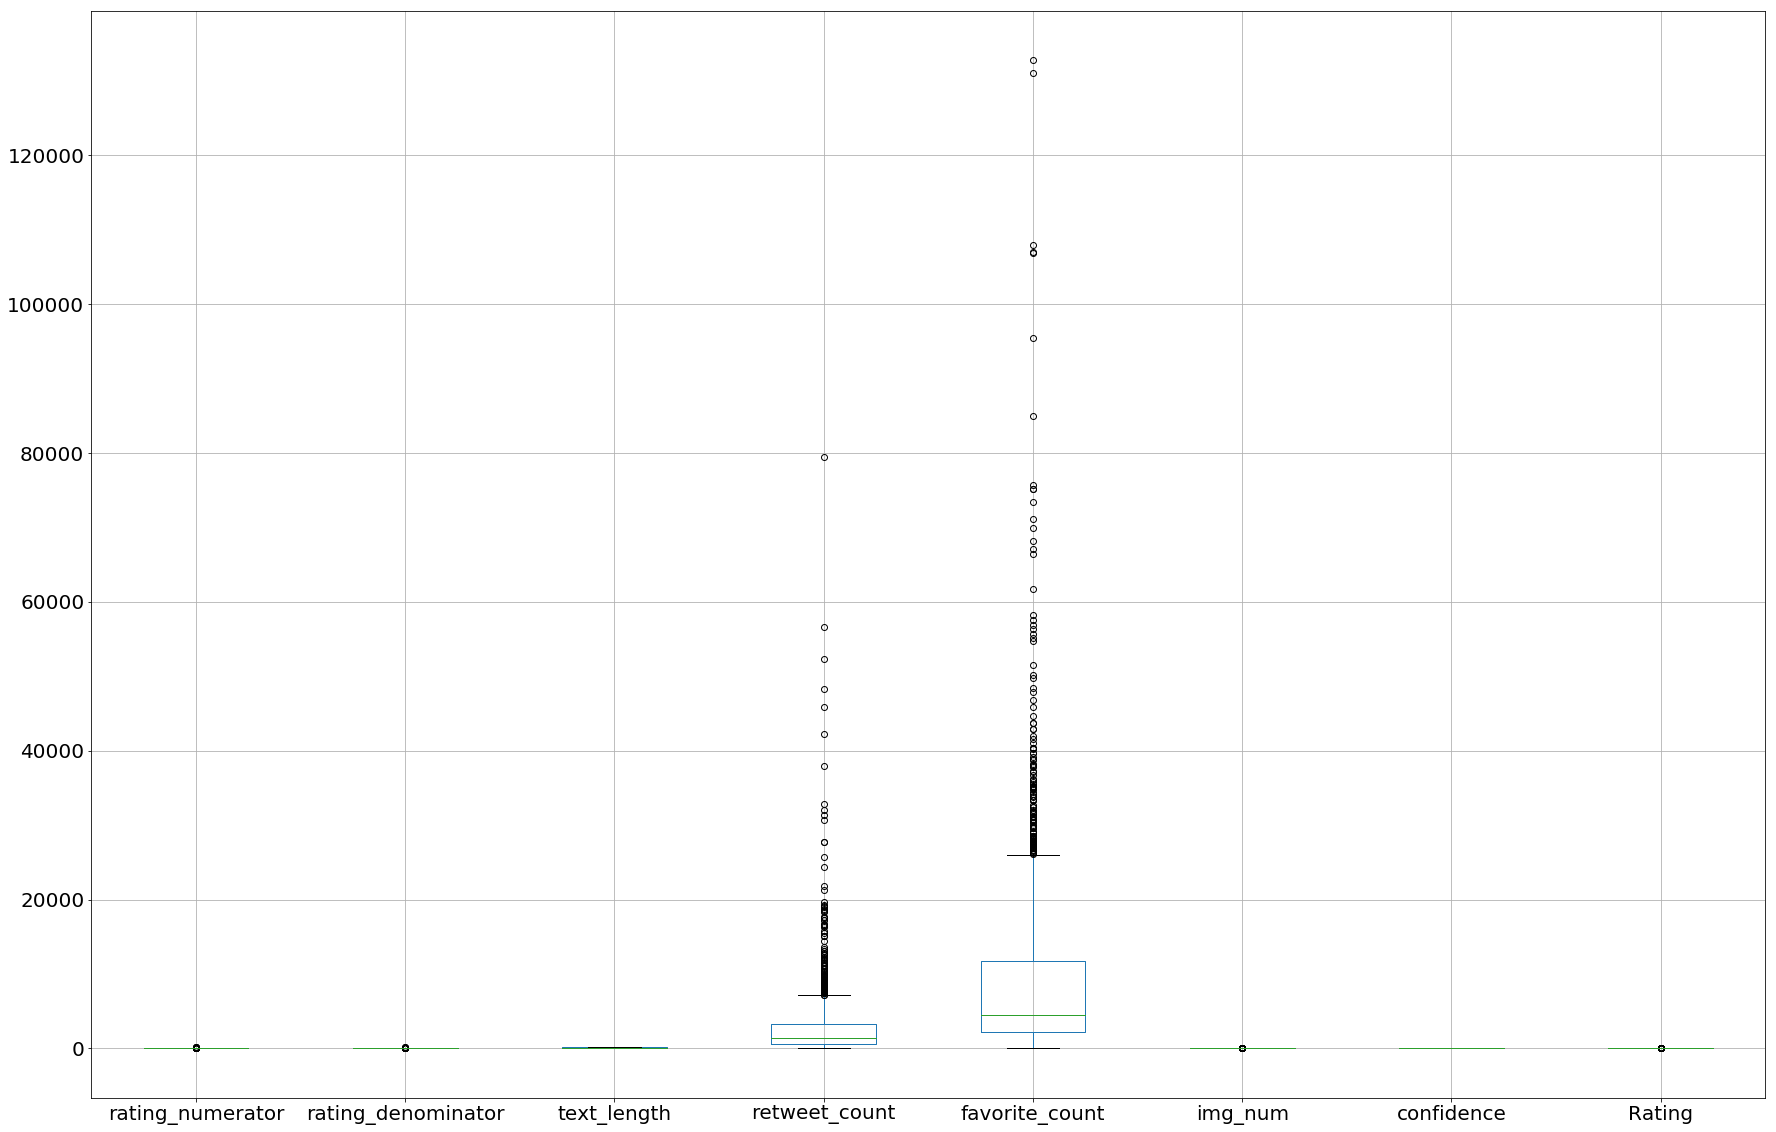

In [95]:
final_cleaned.boxplot(figsize=(30,20),fontsize=20);

there is a huge variation in retweet_count and favorite_count 

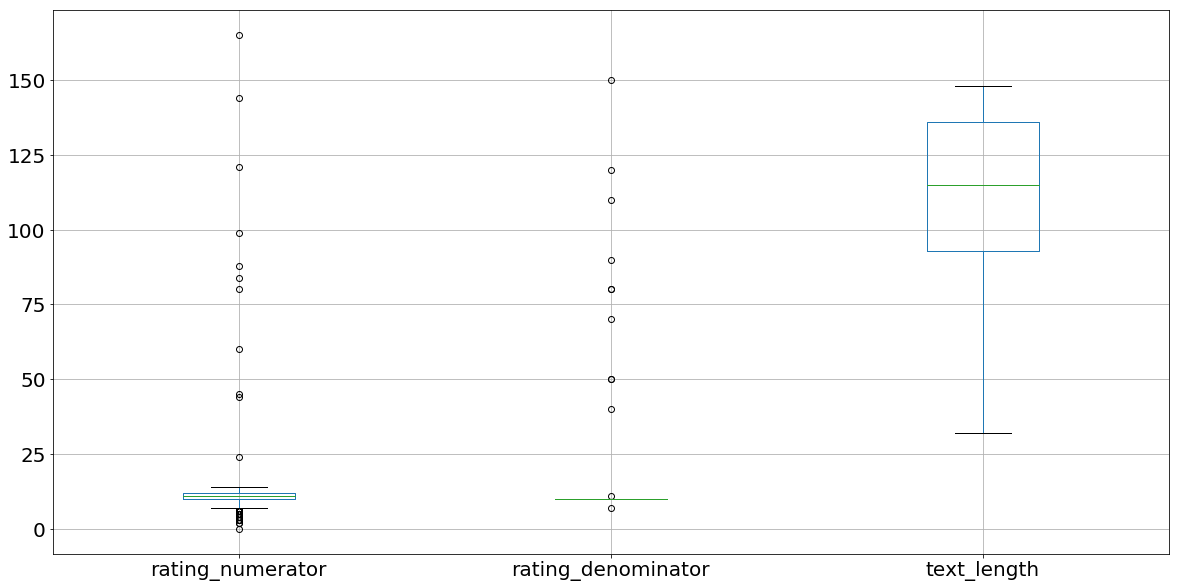

In [96]:
final_cleaned[['rating_numerator','rating_denominator','text_length']].boxplot(figsize=(20,10),fontsize=20)

In [97]:
#top 20 breeds count
def barh(width,keys,title,xlabel,n=10):
    plt.style.use("ggplot")
    plt.figure(figsize=(25,15))
    plt.barh(keys[0:n],width=width[0:n].values,height=0.6,)
    plt.title(title.format(n).title(),fontdict={'fontsize': 30})
    plt.xlabel(xlabel.title(),fontdict={'fontsize': 30})
    plt.tick_params(axis='both',size=5,labelsize =20)
    plt.show()
    

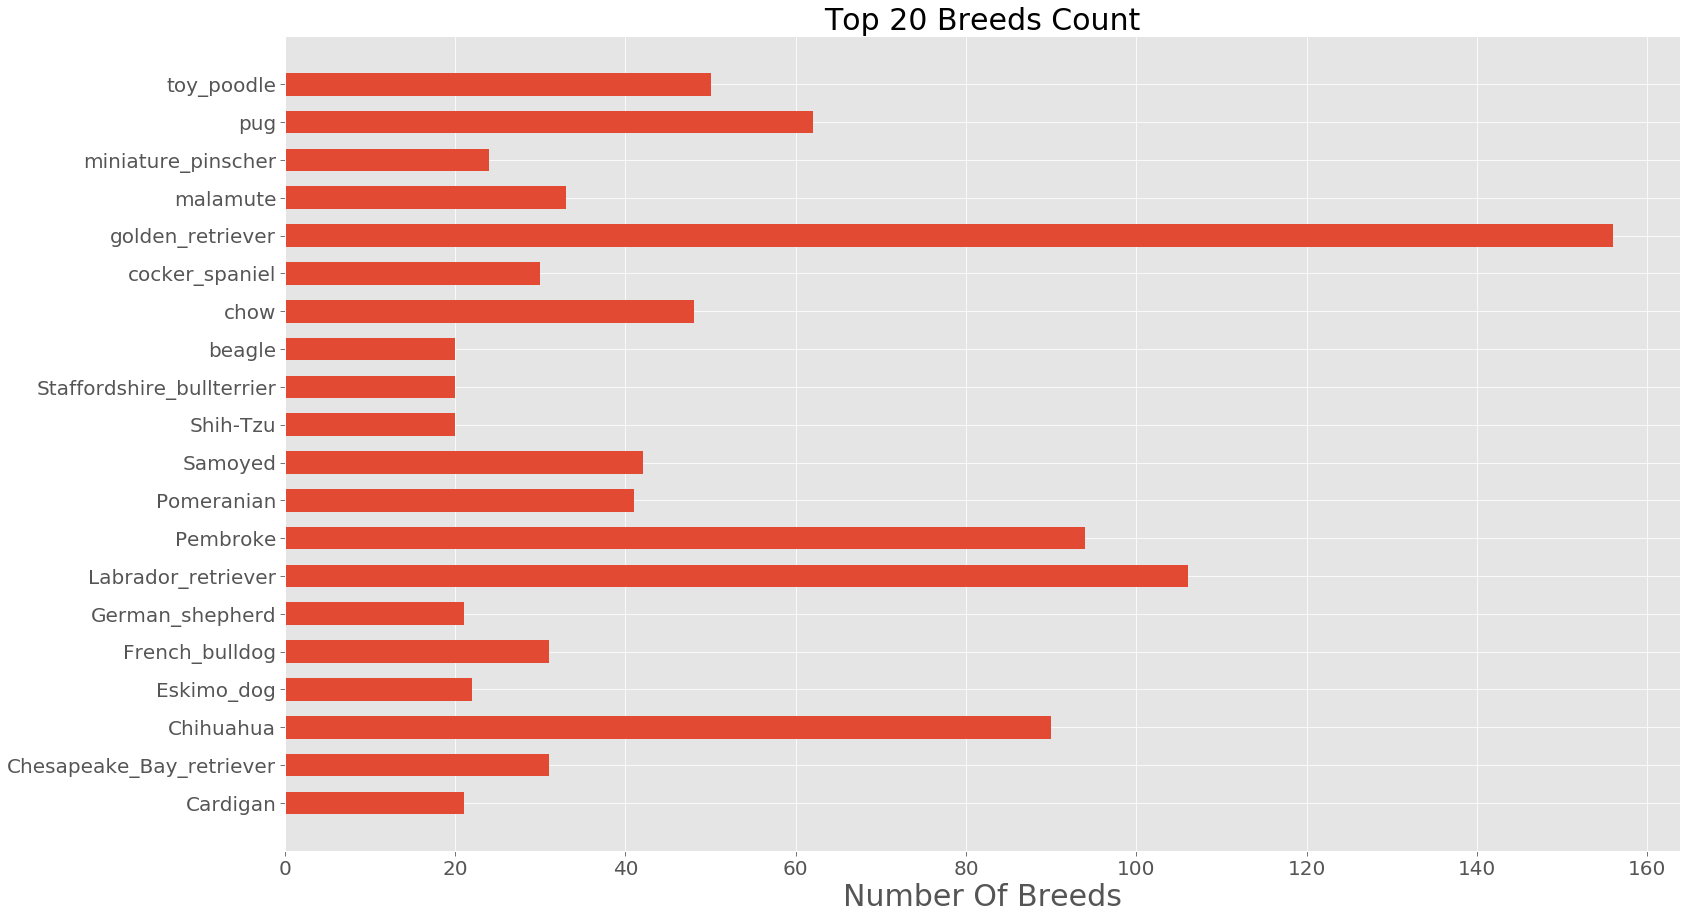

In [98]:
keys=final_cleaned.breed.value_counts(sort=True,ascending=False).keys()
width=final_cleaned.breed.value_counts(sort=True,ascending=False)
barh(width,keys,title='top {} breeds count',xlabel='number of breeds',n=20)

In [99]:
final_cleaned.breed.value_counts().nlargest(20)

golden_retriever             156
Labrador_retriever           106
Pembroke                      94
Chihuahua                     90
pug                           62
toy_poodle                    50
chow                          48
Samoyed                       42
Pomeranian                    41
malamute                      33
French_bulldog                31
Chesapeake_Bay_retriever      31
cocker_spaniel                30
miniature_pinscher            24
Eskimo_dog                    22
German_shepherd               21
Cardigan                      21
beagle                        20
Shih-Tzu                      20
Staffordshire_bullterrier     20
Name: breed, dtype: int64

In [100]:
#grouping data by breed
grouped=final_cleaned.groupby('breed').agg('mean')

In [101]:
grouped.head()

,rating_numerator,rating_denominator,text_length,retweet_count,favorite_count,img_num,confidence,Rating
breed,,,,,,,,
Afghan_hound,9.666667,10.0,103.333333,5976.0000,17326.666667,1.000000,0.433959,0.966667
Airedale,9.833333,10.0,113.833333,1393.7500,5280.833333,1.166667,0.583771,0.983333
American_Staffordshire_terrier,10.312500,10.0,110.125000,2310.8125,9380.187500,1.187500,0.527359,1.031250
Appenzeller,11.000000,10.0,134.500000,1458.0000,7317.500000,1.000000,0.503665,1.100000
Australian_terrier,11.500000,10.0,134.000000,3078.5000,11127.500000,2.000000,0.307584,1.150000


In [102]:
grouped.favorite_count.sort_values(ascending=False).astype(int).nlargest(20)

breed
Saluki                     24060
Bedlington_terrier         21153
French_bulldog             18416
Bouvier_des_Flandres       18032
Afghan_hound               17326
black-and-tan_coonhound    17012
flat-coated_retriever      16791
Irish_water_spaniel        16400
Leonberg                   14934
English_springer           14138
standard_poodle            13912
Samoyed                    13902
Mexican_hairless           13590
cocker_spaniel             13580
Border_terrier             13578
whippet                    12911
Cardigan                   12840
golden_retriever           12460
Great_Pyrenees             12456
Tibetan_mastiff            12173
Name: favorite_count, dtype: int64

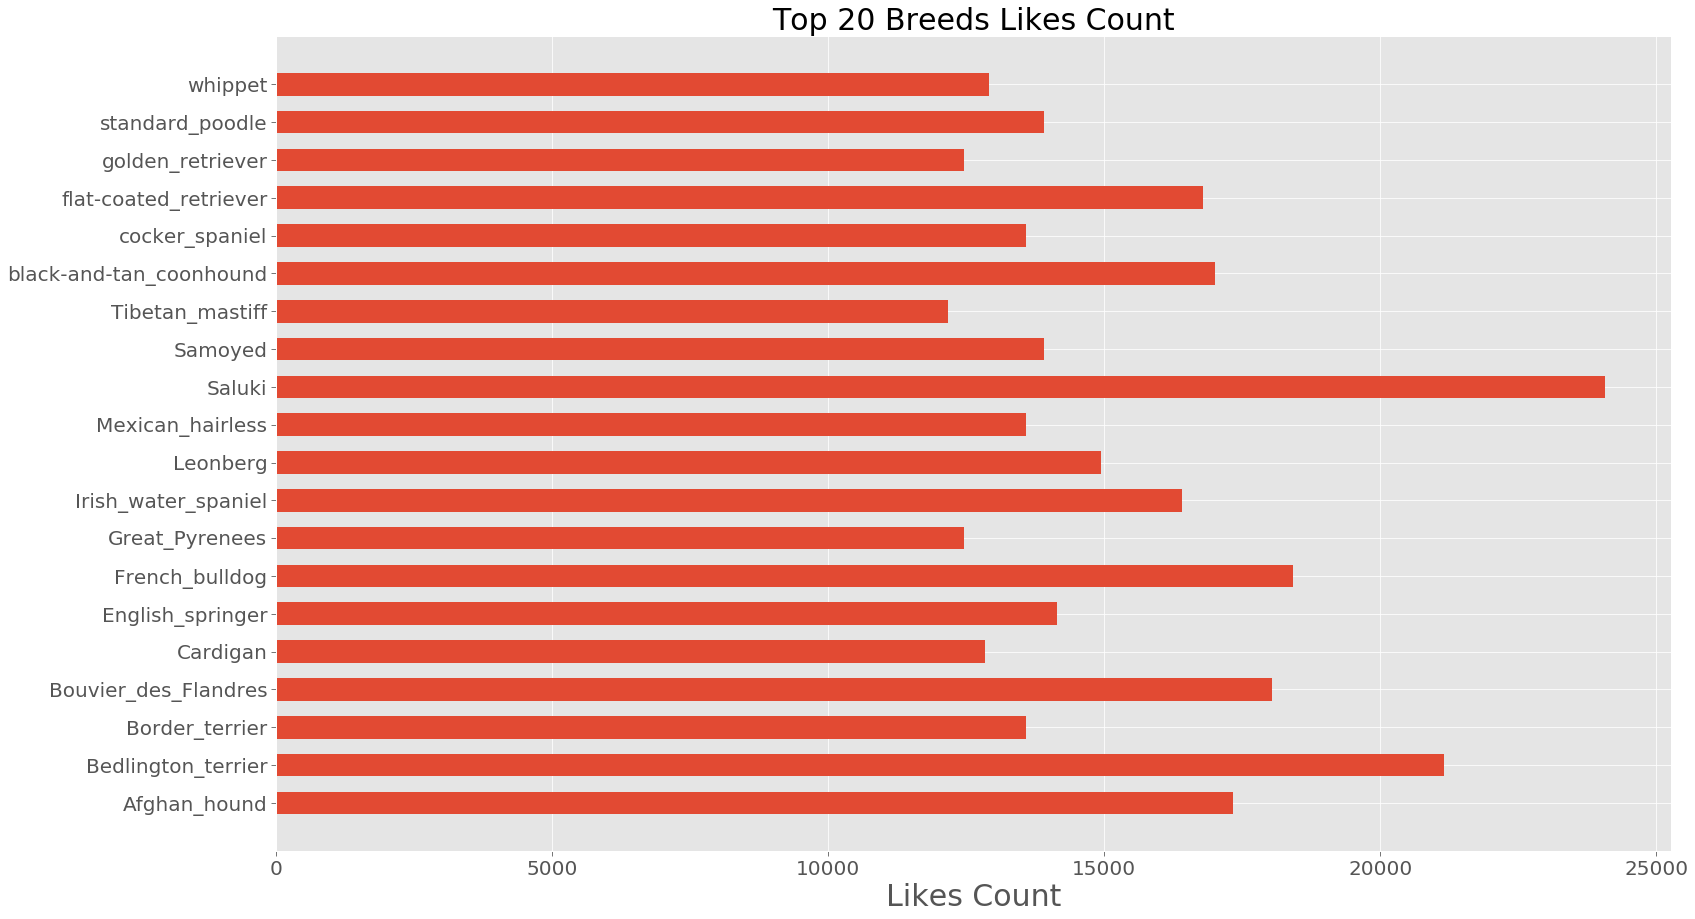

In [103]:
keys=grouped.favorite_count.sort_values(ascending=False).keys()
width=grouped.favorite_count.sort_values(ascending=False).astype(int)
barh(width,keys,title='top {} breeds likes count',xlabel="likes count",n=20)

In [104]:
grouped.retweet_count.sort_values(ascending=False).astype(int).nlargest(20)

breed
Bedlington_terrier         7510
Afghan_hound               5976
standard_poodle            5508
English_springer           5401
Saluki                     5133
French_bulldog             5039
cocker_spaniel             4858
Samoyed                    4843
whippet                    4840
Great_Pyrenees             4533
flat-coated_retriever      4520
Irish_water_spaniel        4500
Bouvier_des_Flandres       4479
Mexican_hairless           4254
Lakeland_terrier           4252
Eskimo_dog                 4235
Tibetan_mastiff            4193
black-and-tan_coonhound    4164
Leonberg                   3863
Labrador_retriever         3824
Name: retweet_count, dtype: int64

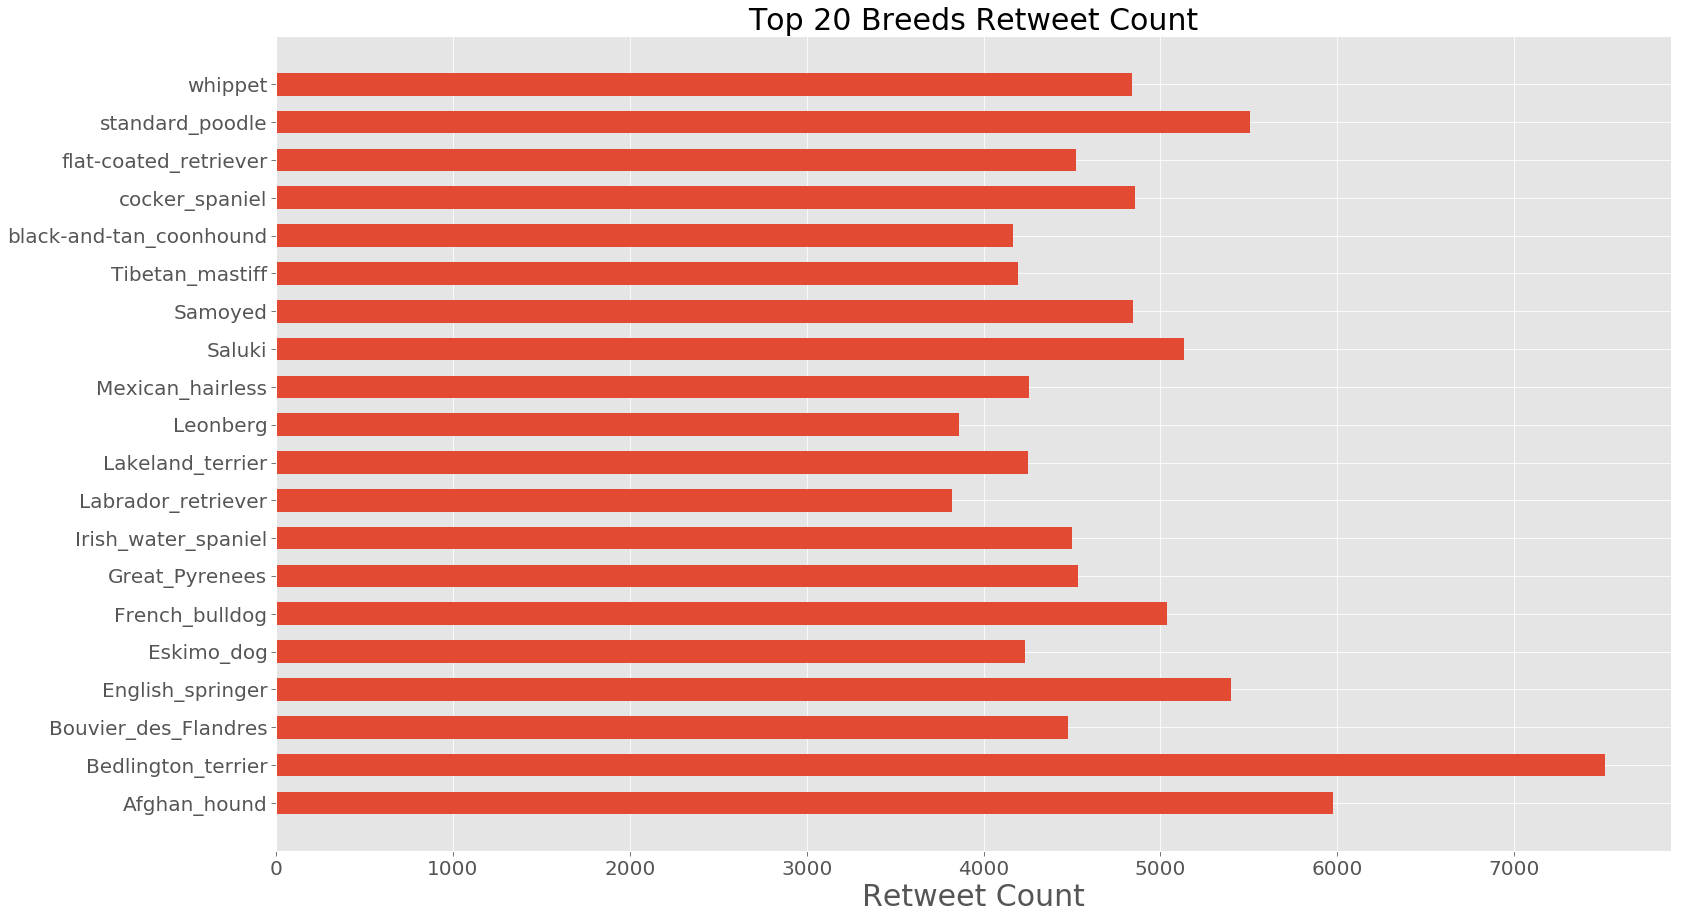

In [105]:
keys=grouped.retweet_count.sort_values(ascending=False).keys()
width=grouped.retweet_count.sort_values(ascending=False).astype(int)
barh(width,keys,title='top {} breeds retweet count',xlabel="retweet count",n=20)

In [106]:
grouped.Rating.sort_values(ascending=False).nlargest(20)

breed
Bouvier_des_Flandres       1.300000
Saluki                     1.250000
briard                     1.233333
Tibetan_mastiff            1.225000
Border_terrier             1.214286
standard_schnauzer         1.200000
silky_terrier              1.200000
Gordon_setter              1.175000
Irish_setter               1.175000
Samoyed                    1.169048
golden_retriever           1.167607
Australian_terrier         1.150000
wire-haired_fox_terrier    1.150000
Great_Pyrenees             1.146667
Pembroke                   1.142553
chow                       1.141667
Eskimo_dog                 1.140909
Irish_water_spaniel        1.133333
Norfolk_terrier            1.133333
Doberman                   1.133333
Name: Rating, dtype: float64

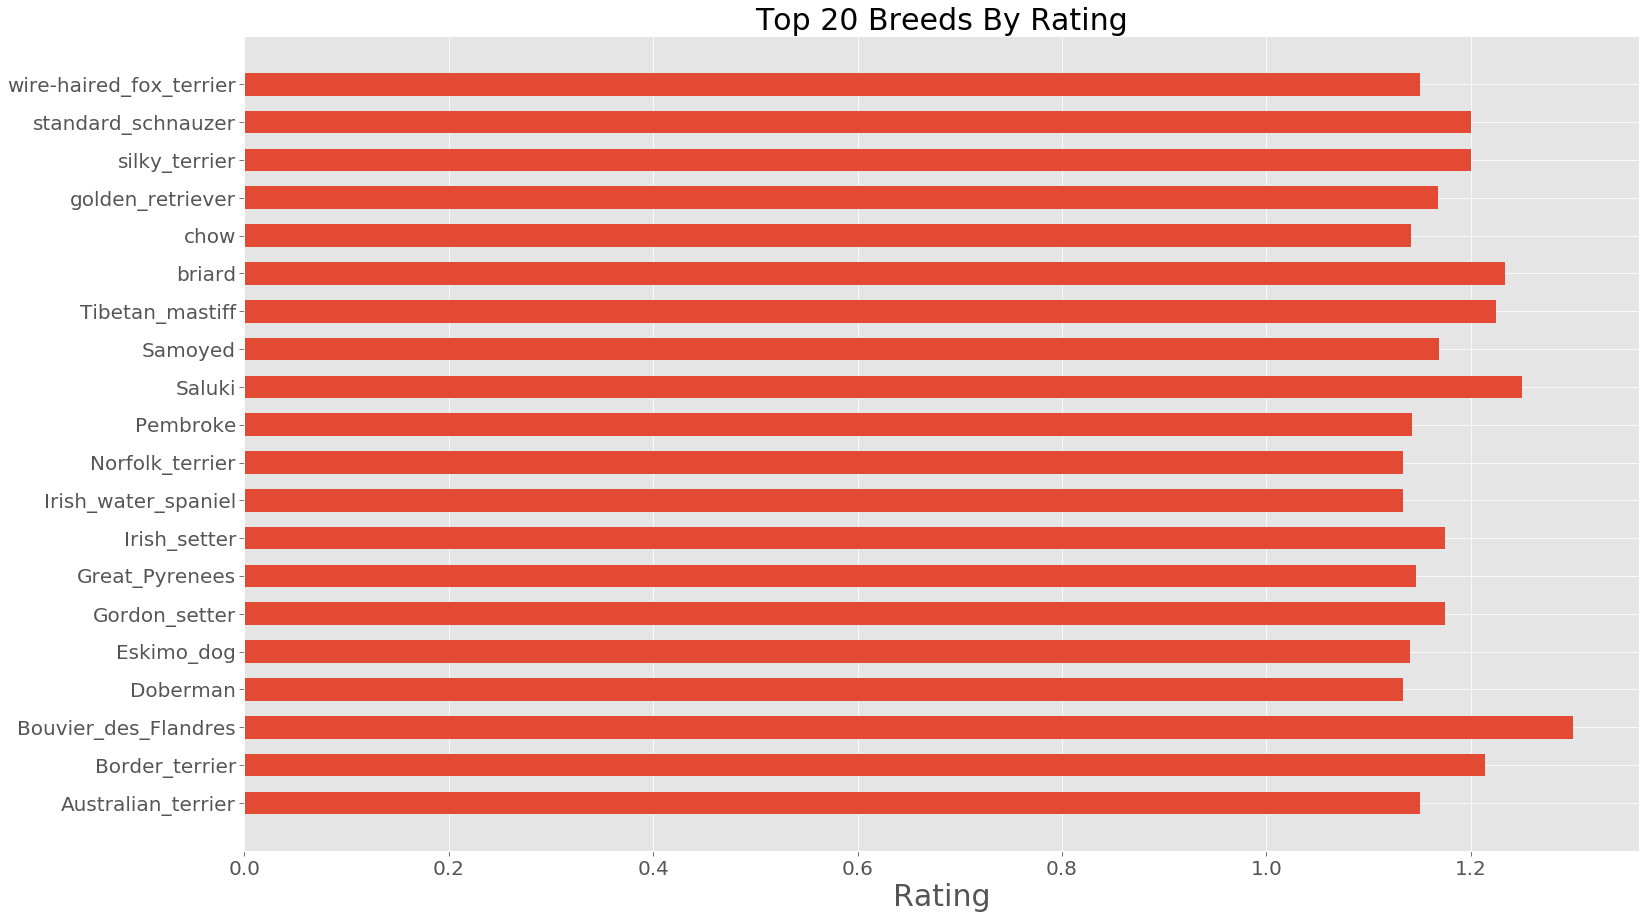

In [107]:
keys=grouped.Rating.sort_values(ascending=False).keys()
width=grouped.Rating.sort_values(ascending=False)

barh(width,keys,title='top {} breeds by Rating',xlabel="Rating",n=20)

In [108]:
grouped.rating_numerator.sort_values(ascending=False).nlargest(20)

breed
soft-coated_wheaten_terrier    21.357143
West_Highland_white_terrier    14.687500
Great_Pyrenees                 14.666667
chow                           14.166667
Labrador_retriever             13.688679
borzoi                         13.600000
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
golden_retriever               12.179487
Border_terrier                 12.142857
silky_terrier                  12.000000
standard_schnauzer             12.000000
Gordon_setter                  11.750000
Irish_setter                   11.750000
Samoyed                        11.690476
wire-haired_fox_terrier        11.500000
Australian_terrier             11.500000
Pembroke                       11.425532
Name: rating_numerator, dtype: float64

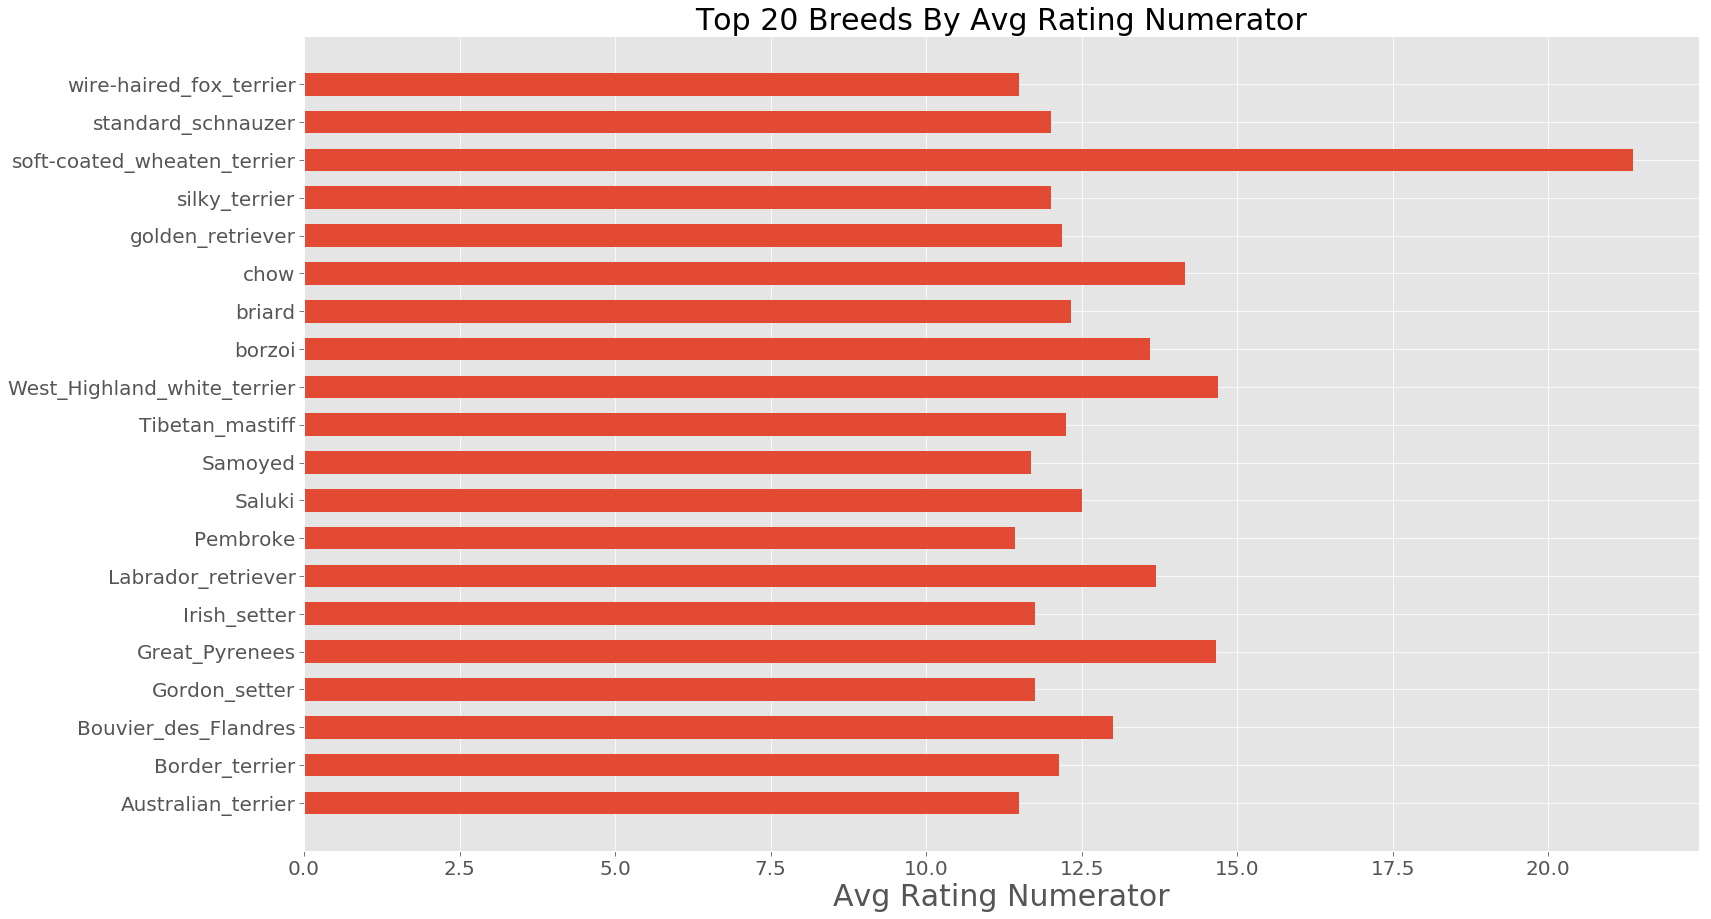

In [109]:
keys=grouped.rating_numerator.sort_values(ascending=False).keys()
width=grouped.rating_numerator.sort_values(ascending=False)

barh(width,keys,title='top {} breeds by avg rating numerator',xlabel="avg rating numerator",n=20)

In [110]:
# relation between rating and favorite count
def relation(x,y,title,xlabel,ylabel):
    plt.figure(figsize=(20,10))
    plt.scatter(x,y)
    plt.title(title.title(),fontdict={'fontsize': 30})
    plt.style.use("ggplot")
    plt.tick_params(labelsize =15)
    plt.xlabel(xlabel.title(),fontdict={'fontsize': 30})
    plt.ylabel(ylabel.title(),fontdict={'fontsize': 30});

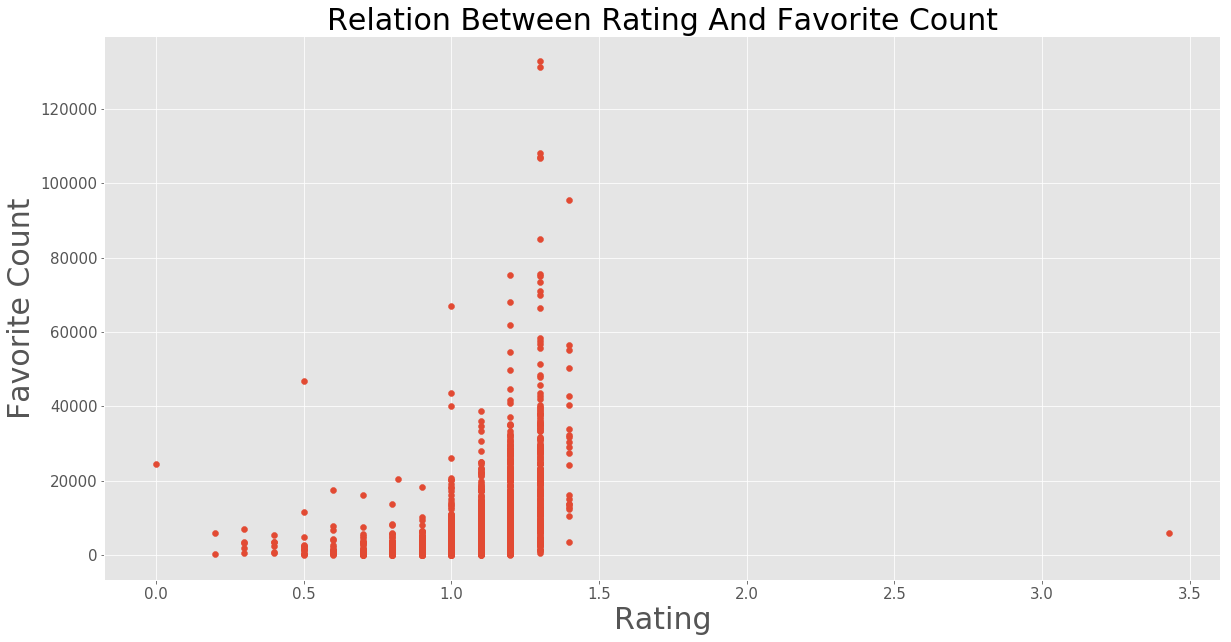

In [111]:
relation(final_cleaned.Rating,final_cleaned.favorite_count,'relation between rating and favorite count',"rating","favorite count")

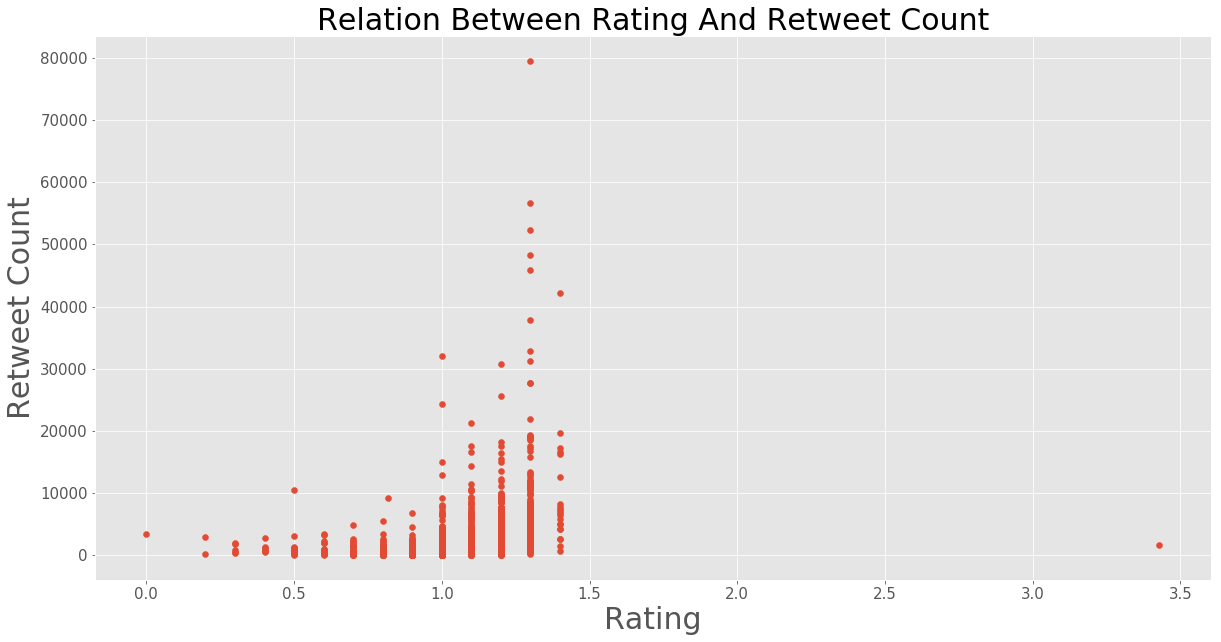

In [112]:
relation(final_cleaned.Rating,final_cleaned.retweet_count,'relation between rating and retweet count',"rating","retweet count")

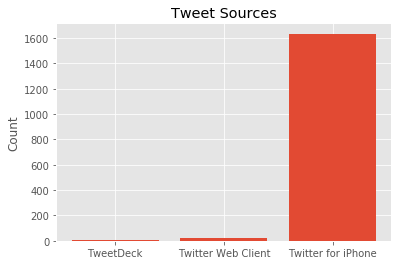

In [113]:
plt.bar(final_cleaned.source.value_counts().keys(),final_cleaned.source.value_counts())
plt.title('Tweet Sources')
plt.ylabel('Count');

In [114]:
import matplotlib
print(matplotlib. __version__)

2.1.0
